## Using Pandas for data visualization 

In [1]:
import pandas as pd

Convention is to call pandas pd

## Importing data into pandas for manipulation

The way one manipulates and processes data in pandas is via dataframes

For ease of understanding, let's talk about something we know a little about in NYC. Home prices. Data sourced from nyc government website
https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

First, when we download the data, click "Download MS Excel" for the Manhattan data. It should save with extension ".xlsx"

For your convenience, I have produced a copy.

Then, open it with excel and save it as ".csv". This is the default format which pandas will know how to process.

To load the dataset into pandas as a dataframe, use the following command and save it to the variable $\texttt{df}$

In [3]:
df = pd.read_csv("nyc_home_sales.csv")

To only show the first 5 rows of the dataset, use $\texttt{head}$. This allows you to know what the column headers are and what the data looks like without loading the ENTIRE dataset which could be time consuming for python.

In [4]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377,70,NaN,B1,235 EAST 7TH STREET,NaN,...,2.0,0.0,2.0,882,"2,160",2003.0,1,B1,"3,025,000",12/16/2021
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,377,52,NaN,C2,271 EAST 7TH STREET,NaN,...,5.0,0.0,5.0,"2,169","3,728",1900.0,2,C2,0,5/10/2022
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,46,NaN,C4,248 EAST 2 STREET,NaN,...,20.0,0.0,20.0,"2,623","11,017",1900.0,2,C4,0,11/15/2021
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,389,45,NaN,C4,631 EAST 6TH STREET,NaN,...,10.0,0.0,10.0,"2,271","6,985",1900.0,2,C4,"5,250,000",6/16/2022
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,389,47,NaN,C4,627 EAST 6TH STREET,NaN,...,10.0,0.0,10.0,"2,248","6,985",1910.0,2,C4,"5,650,000",3/30/2022


You can output a list of columns for your dataset via the following command. Note, the column headers are strings

In [5]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASEMENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       ' SALE PRICE ', 'SALE DATE'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=23517, step=1)

In [9]:
df['NEIGHBORHOOD'].drop_duplicates()

0                    ALPHABET CITY
213                        CHELSEA
1352                     CHINATOWN
1485                  CIVIC CENTER
1763                       CLINTON
2092                  EAST VILLAGE
2362                       FASHION
2505                     FINANCIAL
3115                      FLATIRON
3566                      GRAMERCY
4317     GREENWICH VILLAGE-CENTRAL
5159        GREENWICH VILLAGE-WEST
5964                HARLEM-CENTRAL
7004                   HARLEM-EAST
7187                  HARLEM-UPPER
7316                   HARLEM-WEST
7384                        INWOOD
7529                 JAVITS CENTER
7655                      KIPS BAY
8167                  LITTLE ITALY
8271               LOWER EAST SIDE
8884              MANHATTAN VALLEY
9083                   MIDTOWN CBD
9320                  MIDTOWN EAST
10820                 MIDTOWN WEST
11791          MORNINGSIDE HEIGHTS
11913                  MURRAY HILL
12848             ROOSEVELT ISLAND
13033               

In [10]:
df['GROSS SQUARE FEET'].drop_duplicates()

0         2,160
1         3,728
2        11,017
3         6,985
5        18,099
          ...  
23505     2,521
23507    14,000
23508    16,080
23512    34,570
23515    24,839
Name: GROSS SQUARE FEET, Length: 1326, dtype: object

## Select by columns

To only show a few columns of data, you can use the following notation

Let's say i'm only interested in NEIGHBORHOOD, GROSS SQUARE FEET and SALE PRICE of the buildings in Manhattan

In [50]:
df[['NEIGHBORHOOD', 'GROSS SQUARE FEET', ' SALE PRICE ']]

,NEIGHBORHOOD,GROSS SQUARE FEET,SALE PRICE
0,ALPHABET CITY,"2,160","3,025,000"
1,ALPHABET CITY,"3,728",0
2,ALPHABET CITY,"11,017",0
3,ALPHABET CITY,"6,985","5,250,000"
4,ALPHABET CITY,"6,985","5,650,000"
...,...,...,...
23512,WASHINGTON HEIGHTS UPPER,"34,570","20,600,000"
23513,WASHINGTON HEIGHTS UPPER,0,"550,000"
23514,WASHINGTON HEIGHTS UPPER,0,"6,000,000"
23515,WASHINGTON HEIGHTS UPPER,"24,839","6,000,000"


## Filtering data by criteria

What if i want to only look at the sale data for "HARLEM-WEST" apartments?

In [17]:
query = (df['NEIGHBORHOOD'] == 'HARLEM-WEST')

In [18]:
df[query]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
7316,1,HARLEM-WEST,01 ONE FAMILY DWELLINGS,1,2071,42,NaN,A9,518 W 140TH STREET,NaN,...,1.0,0.0,1.0,"1,499","2,777",1899.0,1,A9,0,2/17/2022
7317,1,HARLEM-WEST,07 RENTALS - WALKUP APARTMENTS,2A,1967,76,NaN,C5,14 CONVENT AVE,NaN,...,6.0,0.0,6.0,901,"1,850",1926.0,2,C5,0,11/24/2021
7318,1,HARLEM-WEST,07 RENTALS - WALKUP APARTMENTS,2,1968,54,NaN,C1,"418 WEST 129TH STREET, 7",NaN,...,20.0,0.0,20.0,"5,731","20,375",1910.0,2,C1,"390,000",6/8/2022
7319,1,HARLEM-WEST,07 RENTALS - WALKUP APARTMENTS,2,1988,8,NaN,C1,527 WEST 134 STREET,NaN,...,25.0,0.0,25.0,"4,796","16,960",1905.0,2,C1,3,3/22/2022
7320,1,HARLEM-WEST,07 RENTALS - WALKUP APARTMENTS,2,1988,12,NaN,C1,523 WEST 134 STREET,NaN,...,25.0,0.0,25.0,"4,796","16,960",1905.0,2,C1,3,3/22/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7379,1,HARLEM-WEST,31 COMMERCIAL VACANT LAND,4,1998,38,NaN,V1,602 WEST 132 STREET (ADJACENT TO),NaN,...,0.0,0.0,0.0,"4,996",0,NaN,4,V1,"3,000,000",12/30/2021
7380,1,HARLEM-WEST,33 EDUCATIONAL FACILITIES,4,1997,1,NaN,W6,2285 12TH AVENUE (ADJACENT TO),NaN,...,0.0,6.0,6.0,"154,876","478,842",2019.0,4,W6,"1,451,613",12/30/2021
7381,1,HARLEM-WEST,33 EDUCATIONAL FACILITIES,4,1997,8001,NaN,Z9,N/A WEST 131 STREET,NaN,...,0.0,0.0,0.0,"22,500","22,500",2021.0,4,W6,"1,451,613",12/30/2021
7382,1,HARLEM-WEST,39 TRANSPORTATION FACILITIES,4,1999,1,NaN,T9,N/A 12TH AVENUE (ADJACENT TO),NaN,...,0.0,1.0,1.0,"134,844","318,000",1989.0,4,T9,"3,000,000",12/30/2021


What if i want both 'HARLEM-WEST' OR 'MORNINGSIDE HEIGHTS'. Use the | operator for or and & for and. Make sure to put the different query criteria in ()

In [19]:
query = (df['NEIGHBORHOOD'] == 'HARLEM-WEST') | (df['NEIGHBORHOOD'] == 'MORNINGSIDE HEIGHTS')

In [20]:
df[query]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
7316,1,HARLEM-WEST,01 ONE FAMILY DWELLINGS,1,2071,42,NaN,A9,518 W 140TH STREET,NaN,...,1.0,0.0,1.0,"1,499","2,777",1899.0,1,A9,0,2/17/2022
7317,1,HARLEM-WEST,07 RENTALS - WALKUP APARTMENTS,2A,1967,76,NaN,C5,14 CONVENT AVE,NaN,...,6.0,0.0,6.0,901,"1,850",1926.0,2,C5,0,11/24/2021
7318,1,HARLEM-WEST,07 RENTALS - WALKUP APARTMENTS,2,1968,54,NaN,C1,"418 WEST 129TH STREET, 7",NaN,...,20.0,0.0,20.0,"5,731","20,375",1910.0,2,C1,"390,000",6/8/2022
7319,1,HARLEM-WEST,07 RENTALS - WALKUP APARTMENTS,2,1988,8,NaN,C1,527 WEST 134 STREET,NaN,...,25.0,0.0,25.0,"4,796","16,960",1905.0,2,C1,3,3/22/2022
7320,1,HARLEM-WEST,07 RENTALS - WALKUP APARTMENTS,2,1988,12,NaN,C1,523 WEST 134 STREET,NaN,...,25.0,0.0,25.0,"4,796","16,960",1905.0,2,C1,3,3/22/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11908,1,MORNINGSIDE HEIGHTS,13 CONDOS - ELEVATOR APARTMENTS,2,1977,1162,NaN,R4,"543 WEST 122ND STREET, 26C",26C,...,1.0,NaN,1.0,NaN,NaN,2018.0,2,R4,"2,437,750",9/10/2021
11909,1,MORNINGSIDE HEIGHTS,13 CONDOS - ELEVATOR APARTMENTS,2,1977,1171,NaN,R4,"543 WEST 122ND STREET, 28D",28D,...,1.0,NaN,1.0,NaN,NaN,2018.0,2,R4,"3,350,000",7/1/2021
11910,1,MORNINGSIDE HEIGHTS,13 CONDOS - ELEVATOR APARTMENTS,2,1977,1177,NaN,R4,"543 WEST 122ND STREET, 30B",30B,...,1.0,NaN,1.0,NaN,NaN,2018.0,2,R4,"4,750,000",10/28/2021
11911,1,MORNINGSIDE HEIGHTS,13 CONDOS - ELEVATOR APARTMENTS,2,1977,1183,NaN,R4,"543 WEST 122ND, 33B",33B,...,1.0,NaN,1.0,NaN,NaN,2018.0,2,R4,"4,061,054",5/23/2022


What if I want both 'HARLEM-WEST' OR 'MORNINGSIDE HEIGHTS' apartments but the apartments must have 'GROSS SQUARE FEET' larger than 15000 sq ft?

In [21]:
query = ((df['NEIGHBORHOOD'] == 'HARLEM-WEST') | (df['NEIGHBORHOOD'] == 'MORNINGSIDE HEIGHTS')) & (df['GROSS SQUARE FEET'] >= 15000)

TypeError: '>=' not supported between instances of 'str' and 'int'

In [53]:
df[query]

TypeError: '>=' not supported between instances of 'str' and 'int'

Opps, what happened there? If an error is thrown, number one rule of debugging is reading the error. Especially the last line. TypeError: '>=' not supported between instances of 'str' and 'int'

This must mean, the column of ''GROSS SQUARE FEET' must be a string and not an integer. So how do we fix that? First we confirm our suspicion that the column of GROSS SQUARE FEET contains strings with the function type, which shows us the type of data we're dealing with.

In [54]:
type(df['GROSS SQUARE FEET'][0])

str

Indeed it is a string. So i looked up "pandas column str numbers with commas" on google and found this post on stackoverflow (key resource for coding). https://stackoverflow.com/questions/22137723/convert-number-strings-with-commas-in-pandas-dataframe-to-float

In [22]:
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].str.replace(',', '').astype(float)

In [23]:
df['GROSS SQUARE FEET']

0         2160.0
1         3728.0
2        11017.0
3         6985.0
4         6985.0
          ...   
23512    34570.0
23513        0.0
23514        0.0
23515    24839.0
23516        NaN
Name: GROSS SQUARE FEET, Length: 23517, dtype: float64

In [24]:
df[' SALE PRICE '] = df[' SALE PRICE '].str.replace(',', '').astype(float)

In [25]:
query = ((df['NEIGHBORHOOD'] == 'HARLEM-WEST') | (df['NEIGHBORHOOD'] == 'MORNINGSIDE HEIGHTS')) & (df['GROSS SQUARE FEET'] >= 15000)

In [26]:
df[query] 

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
7318,1,HARLEM-WEST,07 RENTALS - WALKUP APARTMENTS,2,1968,54,NaN,C1,"418 WEST 129TH STREET, 7",NaN,...,20.0,0.0,20.0,"5,731",20375.0,1910.0,2,C1,390000.0,6/8/2022
7319,1,HARLEM-WEST,07 RENTALS - WALKUP APARTMENTS,2,1988,8,NaN,C1,527 WEST 134 STREET,NaN,...,25.0,0.0,25.0,"4,796",16960.0,1905.0,2,C1,3.0,3/22/2022
7320,1,HARLEM-WEST,07 RENTALS - WALKUP APARTMENTS,2,1988,12,NaN,C1,523 WEST 134 STREET,NaN,...,25.0,0.0,25.0,"4,796",16960.0,1905.0,2,C1,3.0,3/22/2022
7327,1,HARLEM-WEST,07 RENTALS - WALKUP APARTMENTS,2,2002,39,NaN,C1,"610 WEST 136TH STREET, 4C",NaN,...,20.0,0.0,20.0,"5,445",19600.0,1905.0,2,C1,420000.0,2/10/2022
7328,1,HARLEM-WEST,08 RENTALS - ELEVATOR APARTMENTS,2,1999,36,NaN,D7,3291 BROADWAY (ADJACENT TO),NaN,...,50.0,5.0,55.0,"10,625",53340.0,1905.0,2,D7,3000000.0,12/30/2021
7349,1,HARLEM-WEST,21 OFFICE BUILDINGS,4,1998,17,NaN,O5,615 WEST 131 STREET (ADJACENT TO),NaN,...,0.0,6.0,6.0,"34,970",210000.0,1924.0,4,O5,3000000.0,12/30/2021
7352,1,HARLEM-WEST,22 STORE BUILDINGS,4,2004,102,NaN,K2,2328 12TH AVENUE,NaN,...,0.0,1.0,1.0,"34,537",41347.0,1938.0,4,K2,25200000.0,12/30/2021
7355,1,HARLEM-WEST,29 COMMERCIAL GARAGES,4,1998,10,NaN,G1,641 WEST 131 STREET (ADJACENT TO),NaN,...,0.0,1.0,1.0,"14,988",17800.0,1926.0,4,G1,1451613.0,12/30/2021
7356,1,HARLEM-WEST,29 COMMERCIAL GARAGES,4,1998,13,NaN,G1,635 WEST 131 STREET (ADJACENT TO),NaN,...,0.0,2.0,2.0,"7,494",16000.0,1940.0,4,G1,1451613.0,12/30/2021
7358,1,HARLEM-WEST,29 COMMERCIAL GARAGES,4,1998,61,NaN,G9,2311 12TH AVENUE (ADJACENT TO),NaN,...,0.0,2.0,2.0,"9,992",19984.0,1912.0,4,G9,3000000.0,12/30/2021


We can even scan for post war buildings

In [58]:
df[((df['NEIGHBORHOOD'] == 'HARLEM-WEST') | (df['NEIGHBORHOOD'] == 'MORNINGSIDE HEIGHTS')) & (df['GROSS SQUARE FEET'] >= 15000) & (df['YEAR BUILT'] > 1945)]  

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
7373,1,HARLEM-WEST,30 WAREHOUSES,4,2001,110,NaN,E1,2337 JOE DIMAGGIO HIGHWAY,NaN,...,0.0,4.0,4.0,"7,603",22500.0,1953.0,4,E1,18050000.0,3/3/2022
7380,1,HARLEM-WEST,33 EDUCATIONAL FACILITIES,4,1997,1,NaN,W6,2285 12TH AVENUE (ADJACENT TO),NaN,...,0.0,6.0,6.0,"154,876",478842.0,2019.0,4,W6,1451613.0,12/30/2021
7381,1,HARLEM-WEST,33 EDUCATIONAL FACILITIES,4,1997,8001,NaN,Z9,N/A WEST 131 STREET,NaN,...,0.0,0.0,0.0,"22,500",22500.0,2021.0,4,W6,1451613.0,12/30/2021
7382,1,HARLEM-WEST,39 TRANSPORTATION FACILITIES,4,1999,1,NaN,T9,N/A 12TH AVENUE (ADJACENT TO),NaN,...,0.0,1.0,1.0,"134,844",318000.0,1989.0,4,T9,3000000.0,12/30/2021
11792,1,MORNINGSIDE HEIGHTS,08 RENTALS - ELEVATOR APARTMENTS,2,1963,9,NaN,D3,415 WEST 120 STREET,NaN,...,80.0,0.0,80.0,"7,569",58647.0,2019.0,2,D3,83750000.0,11/3/2021


## Descriptive statistics with pandas

Let's say we want to look at the mean, median home prices in the morningside heights neighborhood. We can filter the dataset as follows and use the $\texttt{describe()}$ to get key stats

In [27]:
query = df['NEIGHBORHOOD'] == 'MORNINGSIDE HEIGHTS'

In [32]:
df[query][' SALE PRICE '].describe()

count    1.220000e+02
mean     1.935897e+06
std      7.536245e+06
min      0.000000e+00
25%      5.900000e+05
50%      9.638515e+05
75%      1.683676e+06
max      8.375000e+07
Name:  SALE PRICE , dtype: float64

In [33]:
harlem_west = df[(df['NEIGHBORHOOD'] == 'HARLEM-WEST') & (df[' SALE PRICE '] != 0)][' SALE PRICE ']
mohi = df[(df['NEIGHBORHOOD'] == 'MORNINGSIDE HEIGHTS') & (df[' SALE PRICE '] != 0)][' SALE PRICE ']
uws = df[(df['NEIGHBORHOOD'] == 'UPPER WEST SIDE (96-116)') & (df[' SALE PRICE '] != 0)][' SALE PRICE ']

data = [harlem_west, mohi, uws]

In [34]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sale price ($)')

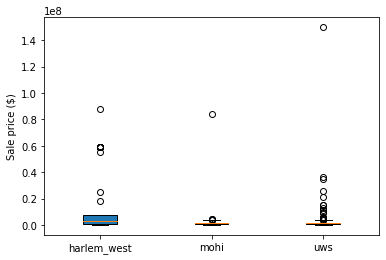

In [35]:
plt.boxplot(data, patch_artist=True, labels=['harlem_west', 'mohi', 'uws'])
plt.ylabel("Sale price ($)")

## ANOVA test to compare mean home prices

If someone were to ask you how to quantify if the mean prices for real estate in harlem west, morningside heights and uws are different statistically. The way you'd do that is via an ANOVA test

In [36]:
import scipy.stats as stats

In [37]:
F_value, p_value = stats.f_oneway(harlem_west, mohi, uws)

In [38]:
print(p_value)

2.4062255200085983e-11


Since p value is less than the usual 0.05 used in scientific research, we can conclude the mean prices for real estate between the 3 neighborhoods are different.

More reading:
https://www.reneshbedre.com/blog/anova.html

## Plotting dataframe with matplotlib.pyploy

We can make simple plots easily with matplotlib.pyplot for different columns. For example, if we wanted to plot SALE PRICE vs GROSS SQUARE FEET:

In [66]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'gross sq ft')

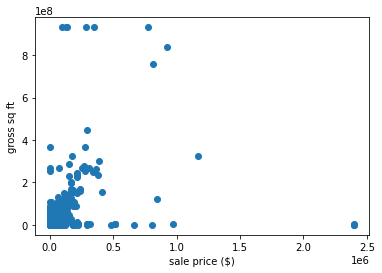

In [39]:
plt.scatter(df[df[' SALE PRICE '] != 0]['GROSS SQUARE FEET'], df[df[' SALE PRICE '] != 0][' SALE PRICE '])
plt.xlabel('sale price ($)')
plt.ylabel('gross sq ft')

Text(0, 0.5, 'Sale price ($)')

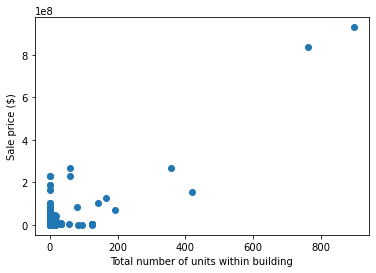

In [40]:
plt.scatter(df[(df['YEAR BUILT'] > 2000) & (df[' SALE PRICE '] != 0)]['TOTAL UNITS'], df[(df['YEAR BUILT'] > 2000) & (df[' SALE PRICE '] != 0)][' SALE PRICE '])
plt.xlabel("Total number of units within building")
plt.ylabel("Sale price ($)")

Hmm, perhaps theres a linear relationship between them... Let's try to understand if that's true

Is there a physical difference in price of buildings across neighborhoods? Maybe between Harlem-west, Morningside Heights and UWS (96-116)?

## Linear regression with scipy

To quantify the relationship between total number of units within a building and the sale price, we can run what is called a linear regression. Where its basically trying to fit a straight line through the data points to establish a linear relationship between Total units within a building and Sale price.

$$\text{Sale price} = \beta_0 + \beta_1 * \text{Total Units}$$

$\beta_0$ is the intercept of the line, while  $\beta_1$ is the slope of the line

In [41]:
import scipy
import scipy.stats as stats

Note, sometimes, there are 'nan' rows, we need to drop those otherwise scipy cannot compute the regression results

In [42]:
df = df[(df['YEAR BUILT'] > 2000) & (df[' SALE PRICE '] != 0)][['TOTAL UNITS', ' SALE PRICE ']].dropna()
y = df[' SALE PRICE '] 
x = df['TOTAL UNITS']

In [43]:
results = stats.linregress(x,y)

In [44]:
results

LinregressResult(slope=901513.9744640249, intercept=3362237.772911058, rvalue=0.8212300703390055, pvalue=0.0, stderr=10004.47324754695, intercept_stderr=220445.2869755034)

Text(0, 0.5, 'Sale price ($)')

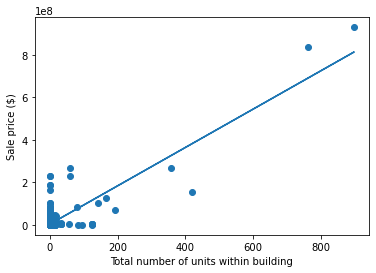

In [45]:
plt.scatter(x, y)
plt.plot(x, results.intercept + x * results.slope)
plt.xlabel("Total number of units within building")
plt.ylabel("Sale price ($)")

In [47]:
results.rvalue**2

0.6744188284290079

## Q1

a) Find the address for the most expensive building in morningside heights

b) Find the address for the building with the most number of total units in morningside heights

c)Find the addresses for all buildings in Soho built after 1950 but before 2000

## Q2

a)Make a box plot of the Non-zero sales prices of buildings in UPPER WEST SIDE (59-79), UPPER WEST SIDE (79-96), and UPPER WEST SIDE (96-116)

b)Use ANOVA as shown above to conclude if the mean sale price of buildings in those neighborhoods are different. Print the p-value. If p-value < 0.05, you can conclude the mean prices of buildings sold in the neighborhoods are different.

## Q3

You can sort the dataframe using the function df.sort_values(by=COLUMN_NAME, ascending=False) in a descending order. For example,

In [ ]:
df.sort_values(by='COMMERCIAL UNITS', ascending=False).head()

a)Find the neighborhood with the highest number of commercial units

b)Find the neighborhood with the highest number of residential units